# Double pendulum

In [61]:
%matplotlib notebook # to display the live animation
#import packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# from IPython.display import HTML # to display video in Jupyter Notebook as a mp4 video

In [62]:
# Setup the physical constants
g = 9.8  # acceleration due to gravity
l1 = 1  # length of pendulum 1
l2 = 1  # length of pendulum 2
m1 = 1  # mass of pendulum 1
m2 = 1  # mass of pendulum 2

In [63]:
# Setup the initial conditions
theta1_0 = np.pi / 2
theta2_0 = np.pi / 2
omega1_0 = 0
omega2_0 = 0

In [64]:
# Fix the number of time steps and time step size
dt = 0.01
steps = 2000

In [65]:
# Calculate the derivatives of theta1 and theta2
def derivatives(state, t):
    theta1, theta2, omega1, omega2 = state
    dydx = np.zeros_like(state)
    dydx[0] = omega1
    dydx[1] = omega2

    delta = theta2 - theta1
    den1 = (m1 + m2) * l1 - m2 * l1 * np.cos(delta) * np.cos(delta)
    dydx[2] = (m2 * l1 * omega1 * omega1 * np.sin(delta) * np.cos(delta) +
               m2 * g * np.sin(theta2) * np.cos(delta) +
               m2 * l2 * omega2 * omega2 * np.sin(delta) -
               (m1 + m2) * g * np.sin(theta1)) / den1

    dydx[3] = (-m2 * l2 * omega2 * omega2 * np.sin(delta) * np.cos(delta) +
               (m1 + m2) * g * np.sin(theta1) * np.cos(delta) -
               (m1 + m2) * l1 * omega1 * omega1 * np.sin(delta) -
               (m1 + m2) * g * np.sin(theta2)) / (l2 * den1)
    return dydx

In [66]:
# Integrate the equations of motion using the RK4 method
def integrate(state, t):
    k1 = dt * derivatives(state, t)
    k2 = dt * derivatives(state + 0.5 * k1, t + 0.5 * dt)
    k3 = dt * derivatives(state + 0.5 * k2, t + 0.5 * dt)
    k4 = dt * derivatives(state + k3, t + dt)
    return state + (k1 + 2 * k2 + 2 * k3 + k4) / 6

In [67]:
# Calculate the positions of the pendulums
def calculate_positions(state):
    x1 = l1 * np.sin(state[0])
    y1 = -l1 * np.cos(state[0])
    x2 = x1 + l2 * np.sin(state[1])
    y2 = y1 - l2 * np.cos(state[1])
    return x1, y1, x2, y2

In [68]:
# Set up the initial state
state = np.array([theta1_0, theta2_0, omega1_0, omega2_0])
t = np.arange(0, steps * dt, dt)
x1_list = []
y1_list = []
x2_list = []
y2_list = []

In [69]:
# Simulate the double pendulum - position of the bobs of the two pendulums
for i in range(steps):
    x1, y1, x2, y2 = calculate_positions(state)
    x1_list.append(x1)
    y1_list.append(y1)
    x2_list.append(x2)
    y2_list.append(y2)
    state = integrate(state, t[i])

In [70]:
# Update the animation for each frame
def animate(i):
    x1 = [0, x1_list[i]]
    y1 = [0, y1_list[i]]
    x2 = [x1_list[i], x2_list[i]]
    y2 = [y1_list[i], y2_list[i]]
    x3 = x1_list[:i]
    y3 = y1_list[:i]
    x4 = x2_list[:i]
    y4 = y2_list[:i]
    line1.set_data(x1, y1)
    line2.set_data(x2, y2)
    line3.set_data(x3, y3)
    line4.set_data(x4, y4)
    return line1, line2, line3, line4

<IPython.core.display.Javascript object>


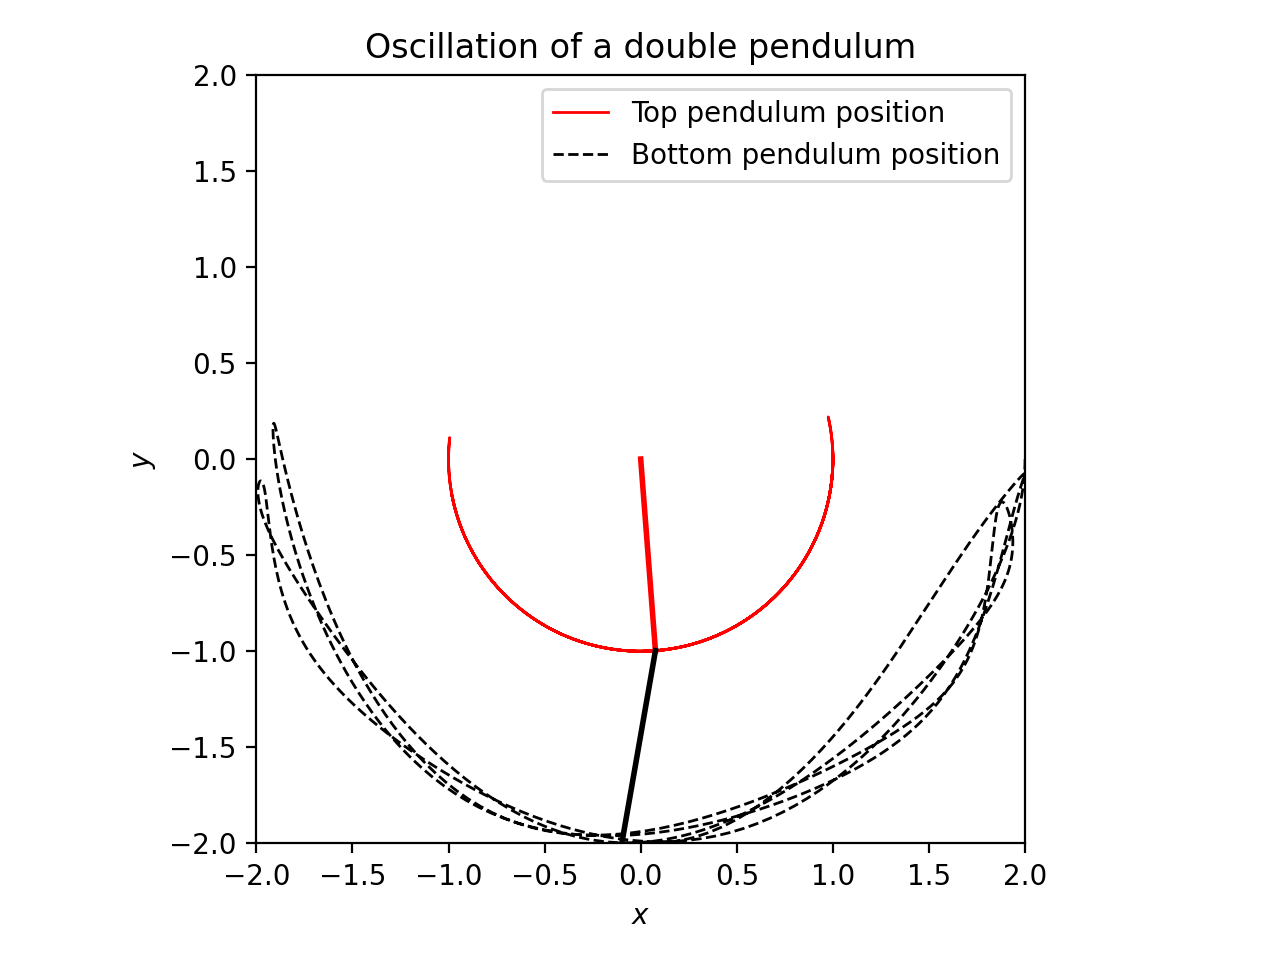

In [95]:
# Setup the figure for animation
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.set_aspect('equal')
line3, = ax.plot([], [], '-', lw=1, color='red') # color of top pendulum's bob position tracker line
line4, = ax.plot([], [], '--', lw=1, color='black') # color of bottom pendulum's bob position tracker line
line1, = ax.plot([], [], '-', lw=2, color='red') # color of top pendulum
line2, = ax.plot([], [], '-', lw=2, color='black') # color of bottom pendulum

# Initialize the animation
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    return line1, line2, line3, line4

# Run the animation
animated_video = animation.FuncAnimation(fig, animate, np.arange(1, len(y1_list)),
                              interval=1, blit=True, init_func=init)

# # Show the animation video
plt.title("Oscillation of a double pendulum")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(["Top pendulum position", "Bottom pendulum position"])
plt.tight_layout()
plt.show()

# # Show the animation video in mp4 format
# HTML(animated_video.to_html5_video())